## 시계열 예측을 위한 딥러닝

### 1. 딥러닝 시계열 섹션 개요

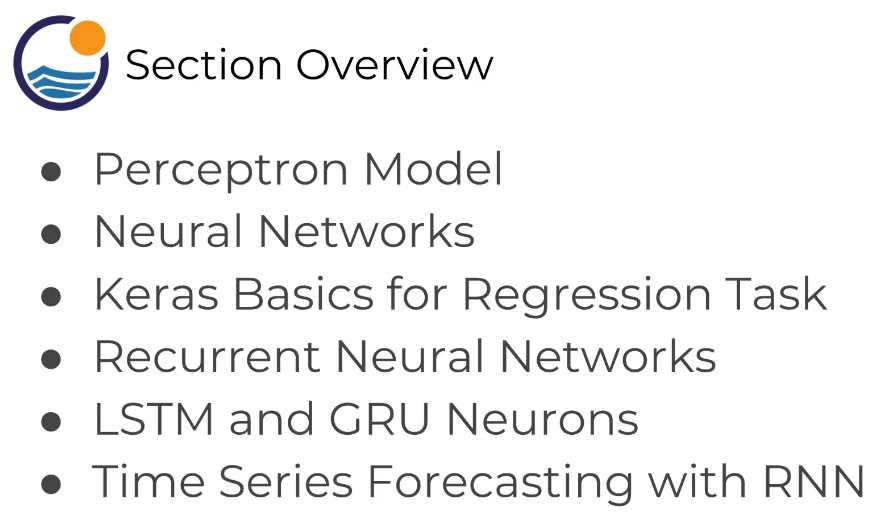

- (1) 퍼셉트론 모델
- (2) 인공 신경망
- (3) 케라스 기본 개요 및 회귀 문제 
> : 어떻게 위의 아이디어를 사용하고, 특정 시계열 데이터와 시퀀스 데이터를 예측하기 위해 아이디어를 확장시킬 수 있을까?
- (4) 순환 신경망(RNN) 
> : 신경세포 모델의 전문화된 타입, 받은 데이터 지점과 입력의 이력 고려
- (5) LSTM 과 GRU(게이트 순환 유닛)
> : 순환 신경망 아이디어를 확장하여, 전문화된 신경세포인 LSTM(장단기 메모리)
- (6) 딥러닝을 활용한 신경망 예측

### 2. 퍼셉트론 모델

- 인공신경망(ANN) : 퍼셉트론이라고 부르는 인공 뉴런을 이용해 생물학적 뉴런을 모방
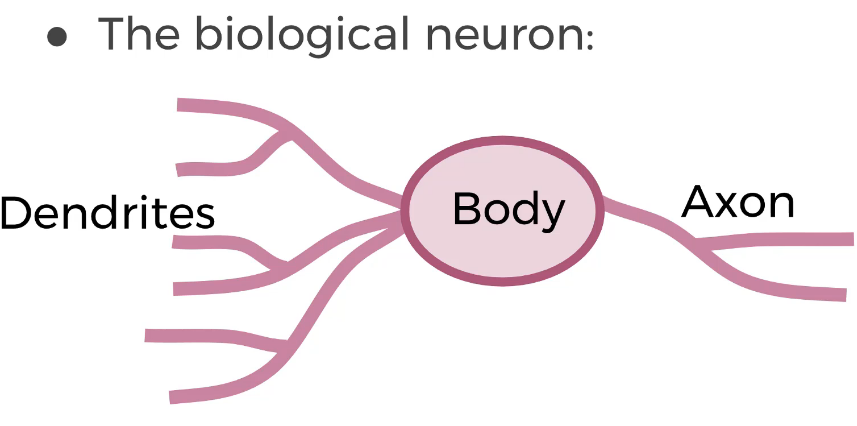

- 퍼셉트론 모델
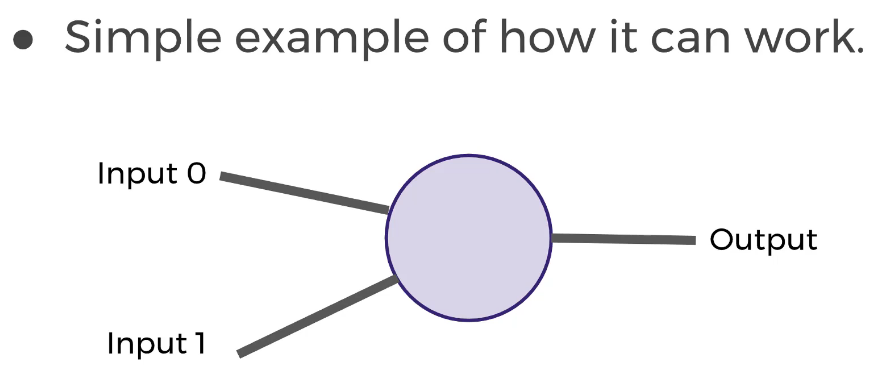
- 두 개의 입력과 하나의 출력

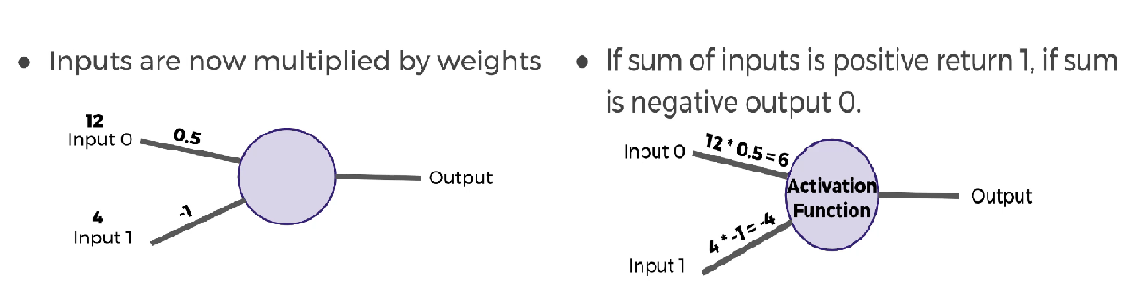
- 숫자(임의 지정) 입력 0(예 12), 입력 1(예 4)
- 입력치에 임의 가중치를 곱하고, 입력 0에 대한 가중치 0, 입력 1에 대한 가중치 1
- 통상적으로 가중치는 일종의 난수 생성을 통해 초기화됨
- 가중치에 임의로 난수를 선택(0.5와 -1)
- 입력치에 가중치를 곱해서, 가중치와 곱한 결과를 취해 이를 활성화 함수로 보냄
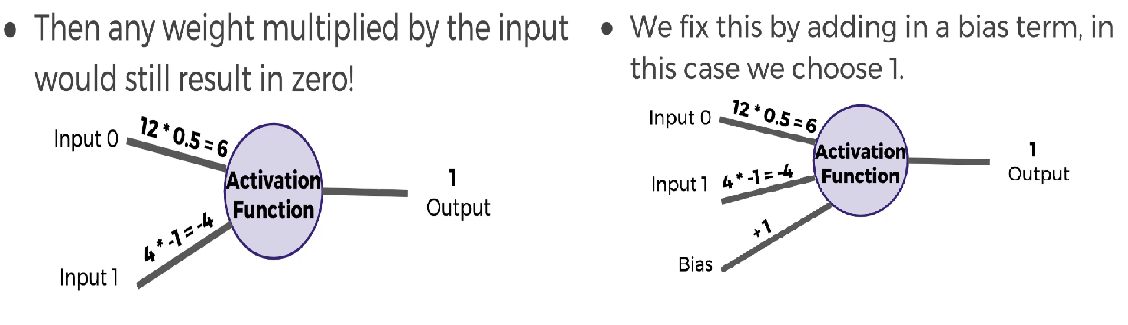

- 활성화 함수는 입력값의 합이 양수이면 1을 반환하거나 1을 출력, 음수이면 0을 출력
- 원래 입력치가 0부터 시작하면, 0이 되는 문제가 발생할 수 있는 데, 이때 편향(bias)를 추가하여 문제를 해결함
- 여기서는 +1이라는 편향값을 임의로 주었음


< 퍼셉트론을 수학적으로 표현 >
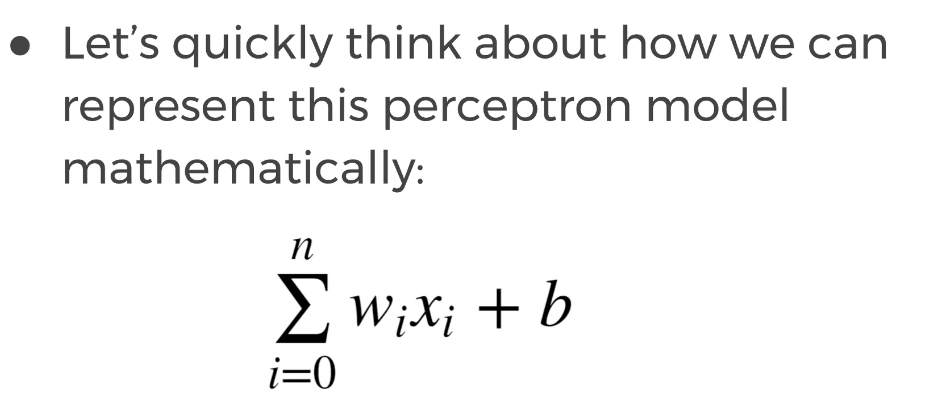

- i는 0부터 n까지, n은 입력의 개수, wi는 입력의 특별한 가중치 그것을 xi, 입력 그자체와 곱하여 편향값을 더함

### 3. 신경망 소개

<다중 퍼셉트론 네트워크>
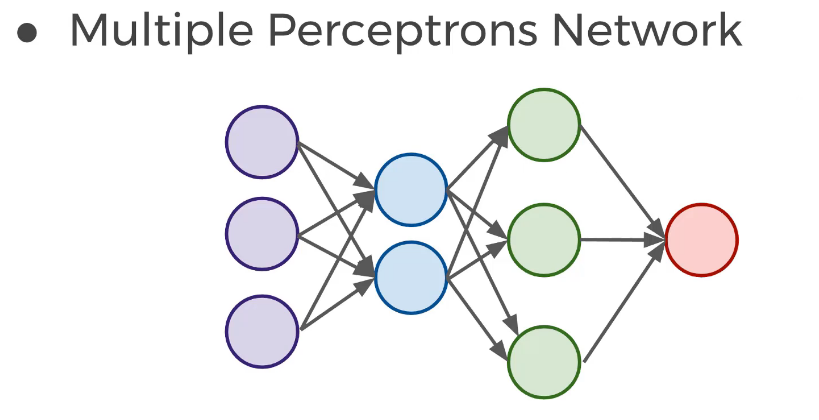
- 다양한 싱글 퍼셉트론 층이 있고, 입력과 출력을 통해 서로 연결되어 있음
- 입력층(데이터에서 나온 실제 값) : 실제 데이터 입력층
- 감춰진 층 : 입력층과 출력층 사이에 있는 층(해당 hidden layer가 3개 이상이면 딥 네트워크라 간주)
- 출력 층 : 추정하려는 최종 추정치
> 층이 많아질수록 추상화 수준이 상승

<활성화함수>
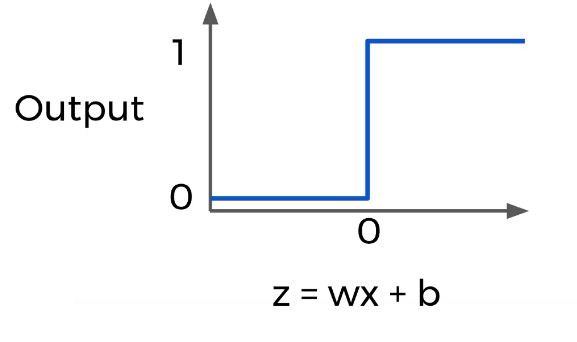
- 출력이 0 이나 1인 간단한 함수
- X축 : w*x+b (가중치에 입력치를 곱하고 편한치를 더함) -> z

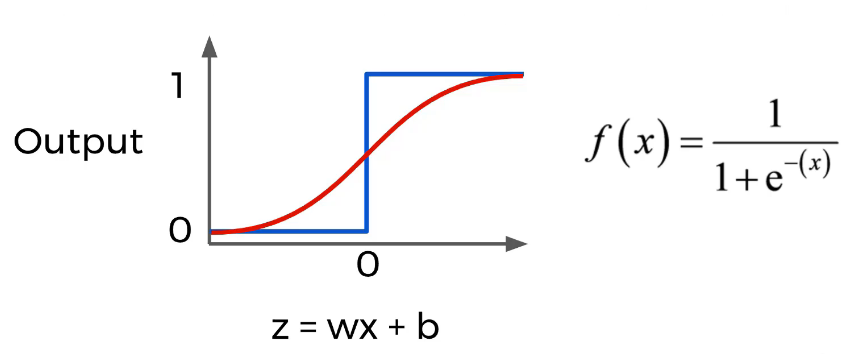
- 동적인 함수(S자형 함수 - 시그모이드 함수) (출력이 0에서 1까지)
- 시그모이드 함수는 f(x) = 1/(1+e-(x)) 이고, 여기서 x를 z로 치환 가능

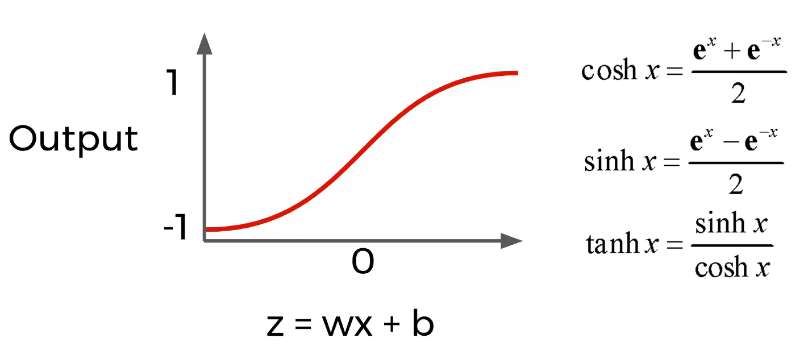
- 그 외에 쌍곡선 탄젠트 함수 tanh, tanh(z), 여기서 z는 w*x + b (출력이 -1부터 1까지 될 수 있음)

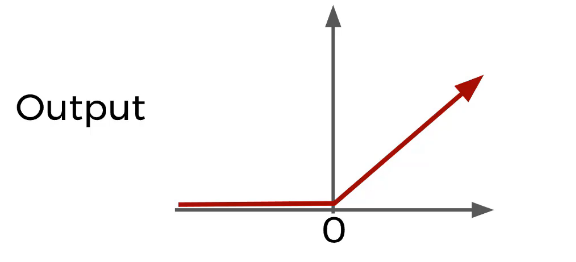
- 정류 선형 유닛 ReLU
- z값을 최대값 방정식에 넣음 max(0,z)
- z 값과 0을 배교하여 최댓갓 반환, z 값이 음수라면 항상 0, 0과 z 사이에 z가 양수라면 항상 z를 반환)

### 4. 케라스 기본

- 임의로 회귀하는 산점을 갖고 신경망을 사용해서 최적의 선을 찾아봄
- 케라스로 신경망을 만들기 위해, 순차적 모델 객체를 정의하고 거기에 층을 더함
- 모델을 갖게 되면 선택된 에포크 수 동안 훈련데이터에 모델을 학습
- epoch(에포크 : 모든 훈련 데이터를 한 번 통과하는 것)
- 훈련 데이터는 신경망을 한번에 통과하는 대신에 배치들로 나눔
- 훈련 셋을 일반화하기 위해서 많은 예제를 알아야 하기 때문(훈련 데이터를 많이 가지고 있고, 한번에 전달해서 망에 과부화를 걸리게 하고 싶지 않으면 한번에 작은 배치들로 전달하면 됨) 
- 단일 훈련 데이터가 모두 통과했다면 그것이 에포크 1
- 보통 전체 훈련 데이터셋은 다수의 에포크 동안 여러 번 학습 함


In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

###  선형 데이터 만들기  y = mx + b + noise

In [2]:
m = 2
b = 3
x = np.linspace(0,50,100)

In [3]:
np.random.seed(101)
noise = np.random.normal(loc=0, scale=4, size=len(x)) # 0에서 시작 평균 편차는 4, 사이즈는 원하는 잡음의 난수
noise

array([ 1.08273994e+01,  2.51253084e+00,  3.63187779e+00,  2.01530302e+00,
        2.60447179e+00, -1.27727218e+00, -3.39230793e+00,  2.42386140e+00,
       -8.07267298e+00,  2.96048823e+00,  2.11525398e+00, -2.35600213e+00,
        7.54781238e-01, -3.03548822e+00, -3.73294887e+00,  3.82022604e+00,
        7.63177289e-01,  7.91502930e+00,  1.04238691e+01,  2.73403554e+00,
        1.21066179e+00,  6.77489170e+00, -6.82434372e+00, -4.63647766e+00,
       -5.39362882e-01,  1.56211137e+00,  6.67618544e-01,  7.38007437e-01,
        3.23082366e+00,  2.91838701e-01,  2.55514805e+00,  1.31858520e+00,
       -1.98841609e+00, -3.01627880e+00, -3.77362561e+00,  1.93900659e+00,
       -4.67093266e-01,  7.60701918e+00,  9.52507835e-01,  7.98660914e+00,
       -3.97305400e+00,  7.87198020e-01, -4.54657837e+00,  1.46591842e-03,
        4.10393661e+00, -6.26391617e-01, -1.26316576e-01,  2.59930333e+00,
        8.61938577e+00, -2.44103542e+00, -3.02130136e+00, -1.38567401e+00,
        5.88107085e-01, -

In [4]:
y = 2 * x + b + noise
y

array([ 13.82739936,   6.52263185,   8.65207981,   8.04560605,
         9.64487583,   6.77323287,   5.66829813,  12.49456847,
         3.0081351 ,  15.05139732,  15.21626408,  11.75510898,
        15.87599336,  13.09582491,  13.40846528,  21.97174119,
        19.92479345,  28.08674647,  31.6056873 ,  24.92595473,
        24.412682  ,  30.98701291,  18.3978785 ,  21.59584557,
        26.70306136,  29.81463662,  29.93024481,  31.01073471,
        34.51365194,  32.58476799,  35.85817836,  35.63171651,
        33.33481623,  33.31705453,  33.56980873,  40.29254194,
        38.8965431 ,  47.98075655,  42.33634622,  50.38054854,
        39.4309864 ,  45.20133943,  40.87766405,  46.43580935,
        51.54838105,  47.82815384,  49.33832989,  53.07405081,
        60.10423426,  50.05391407,  50.48374915,  53.1294775 ,
        56.11335961,  54.61756138,  59.78053217,  62.65479667,
        55.86215953,  68.02721413,  57.05058994,  65.03787123,
        65.15018185,  72.95223574,  64.12018793,  67.55

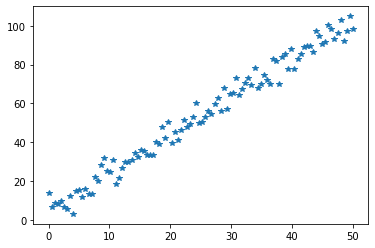

In [5]:
plt.plot(x,y, '*');

- 이 모델에 대한 최적의 선을 찾는 신경망 만듦

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(4, input_dim=1, activation='relu'))  # 특성 한개 만을 예상하는데 y대 x에서 x가 특성 한 개를 가지면 y가 갖늩 특성 한개는 1
model.add(Dense(4, activation='relu')) # 결합층 추가
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam') # 컴파일 함수, 손실이 평균제곱오차와 같음 


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


- 갖고 있는 다른 층과 이 층들의 예상되는 출력의 배열 모양, 더 많은 뉴런을 추가하면서 발생하는 매개변수의 수

In [10]:
model.fit(x,y, epochs=200)

Epoch 1/200
4/4 [==============================] - 9s 667us/step - loss: 14936.5793
Epoch 2/200
4/4 [==============================] - 0s 667us/step - loss: 15265.7904
Epoch 3/200
4/4 [==============================] - 0s 666us/step - loss: 13993.4723
Epoch 4/200
4/4 [==============================] - 0s 667us/step - loss: 14033.8650
Epoch 5/200
4/4 [==============================] - 0s 668us/step - loss: 14480.5406
Epoch 6/200
4/4 [==============================] - 0s 667us/step - loss: 13781.6998
Epoch 7/200
4/4 [==============================] - 0s 667us/step - loss: 13720.1600
Epoch 8/200
4/4 [==============================] - 0s 667us/step - loss: 13045.0104
Epoch 9/200
4/4 [==============================] - 0s 667us/step - loss: 13934.9975
Epoch 10/200
4/4 [==============================] - 0s 667us/step - loss: 12643.2143
Epoch 11/200
4/4 [==============================] - 0s 667us/step - loss: 12069.7412
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 12

4/4 [==============================] - 0s 667us/step - loss: 1860.5270
Epoch 99/200
4/4 [==============================] - 0s 1ms/step - loss: 1724.7301
Epoch 100/200
4/4 [==============================] - 0s 667us/step - loss: 1806.5716
Epoch 101/200
4/4 [==============================] - 0s 667us/step - loss: 1517.0762
Epoch 102/200
4/4 [==============================] - 0s 667us/step - loss: 1590.5928
Epoch 103/200
4/4 [==============================] - 0s 667us/step - loss: 1653.0558
Epoch 104/200
4/4 [==============================] - 0s 668us/step - loss: 1516.6168
Epoch 105/200
4/4 [==============================] - 0s 851us/step - loss: 1431.1837
Epoch 106/200
4/4 [==============================] - 0s 667us/step - loss: 1409.1709
Epoch 107/200
4/4 [==============================] - 0s 667us/step - loss: 1378.2573
Epoch 108/200
4/4 [==============================] - 0s 667us/step - loss: 1258.6831
Epoch 109/200
4/4 [==============================] - 0s 668us/step - loss: 1259.20

4/4 [==============================] - 0s 667us/step - loss: 19.8376
Epoch 197/200
4/4 [==============================] - 0s 667us/step - loss: 21.8081
Epoch 198/200
4/4 [==============================] - 0s 667us/step - loss: 22.3214
Epoch 199/200
4/4 [==============================] - 0s 667us/step - loss: 17.8642
Epoch 200/200
4/4 [==============================] - 0s 667us/step - loss: 19.3223


In [11]:
model.history.history

{'loss': [15402.3974609375,
  15068.93359375,
  14741.1201171875,
  14444.4853515625,
  14154.6728515625,
  13864.275390625,
  13587.412109375,
  13307.1787109375,
  13038.8359375,
  12750.9853515625,
  12482.3486328125,
  12222.451171875,
  11975.56640625,
  11704.162109375,
  11461.0029296875,
  11207.7451171875,
  10980.208984375,
  10753.5859375,
  10526.412109375,
  10315.3427734375,
  10104.9248046875,
  9916.0498046875,
  9719.9443359375,
  9532.0576171875,
  9346.29296875,
  9161.392578125,
  8985.3203125,
  8814.541015625,
  8651.2158203125,
  8491.4716796875,
  8335.79296875,
  8185.3173828125,
  8046.37255859375,
  7904.51513671875,
  7753.73193359375,
  7603.87353515625,
  7457.9345703125,
  7313.865234375,
  7163.93798828125,
  7031.82177734375,
  6895.3056640625,
  6768.18603515625,
  6635.11181640625,
  6511.2998046875,
  6385.46728515625,
  6268.70263671875,
  6150.9658203125,
  6041.3623046875,
  5925.12939453125,
  5815.134765625,
  5707.22607421875,
  5608.3017578125

-> 모든 손실함수의 딕셔너리

In [12]:
model.history.history['loss']

[15402.3974609375,
 15068.93359375,
 14741.1201171875,
 14444.4853515625,
 14154.6728515625,
 13864.275390625,
 13587.412109375,
 13307.1787109375,
 13038.8359375,
 12750.9853515625,
 12482.3486328125,
 12222.451171875,
 11975.56640625,
 11704.162109375,
 11461.0029296875,
 11207.7451171875,
 10980.208984375,
 10753.5859375,
 10526.412109375,
 10315.3427734375,
 10104.9248046875,
 9916.0498046875,
 9719.9443359375,
 9532.0576171875,
 9346.29296875,
 9161.392578125,
 8985.3203125,
 8814.541015625,
 8651.2158203125,
 8491.4716796875,
 8335.79296875,
 8185.3173828125,
 8046.37255859375,
 7904.51513671875,
 7753.73193359375,
 7603.87353515625,
 7457.9345703125,
 7313.865234375,
 7163.93798828125,
 7031.82177734375,
 6895.3056640625,
 6768.18603515625,
 6635.11181640625,
 6511.2998046875,
 6385.46728515625,
 6268.70263671875,
 6150.9658203125,
 6041.3623046875,
 5925.12939453125,
 5815.134765625,
 5707.22607421875,
 5608.3017578125,
 5504.669921875,
 5401.716796875,
 5295.4755859375,
 5198.

In [13]:
loss = model.history.history['loss']
epochs = range(len(loss))

plot.plot(epochs, loss);

NameError: name 'plot' is not defined

In [ ]:
model.fit(x,y, epochs=20)

In [ ]:
model.fit(x,y, epochs=40)

In [ ]:
x_for_prediction = np.linspace(0,50,100)

y_pred = model.predict(x_for_prediction)


In [ ]:
y_pred

In [ ]:
plt.plot(x,y,'*')
plt.plot(x_for_prediction, y_pred, 'r');

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y, y_pred)

### 5. 순환 신경망 이론 개요

- 순환 신경망 : 연속 데이터를 처리하기 위해 고안된 것
- 시퀀스 데이터 예
> - 시계열 데이터
> - 어떤 제품이 판매되었는지
> - 문장(nlp)
> - 자동차의 궤적
- 순환 신경망은 `연속 기반 데이터`에 초점을 맞춤

**`시퀀스`** 
- 인덱스 정보가 가르키는 곳, 시간 정보를 담은 벡터

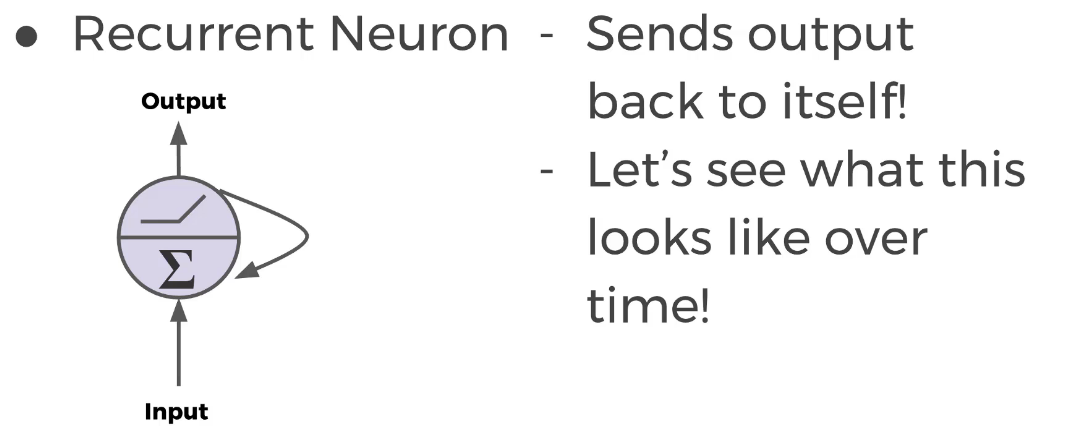
- 정상적인 신경망은 몇 개 혹은 다수의 입력을 모두 합쳐 하나로 만듦  -> 입력을 활성화 함수에 전달 -> 정류 선형 유닛 기호(Relu)/시그모이드/tanh 함수 사용 -> 출력 

<순환 뉴런>
- 출력을 자기 자신에게 다시 보내고 그 출력이 같은 뉴런의 입력이 됨
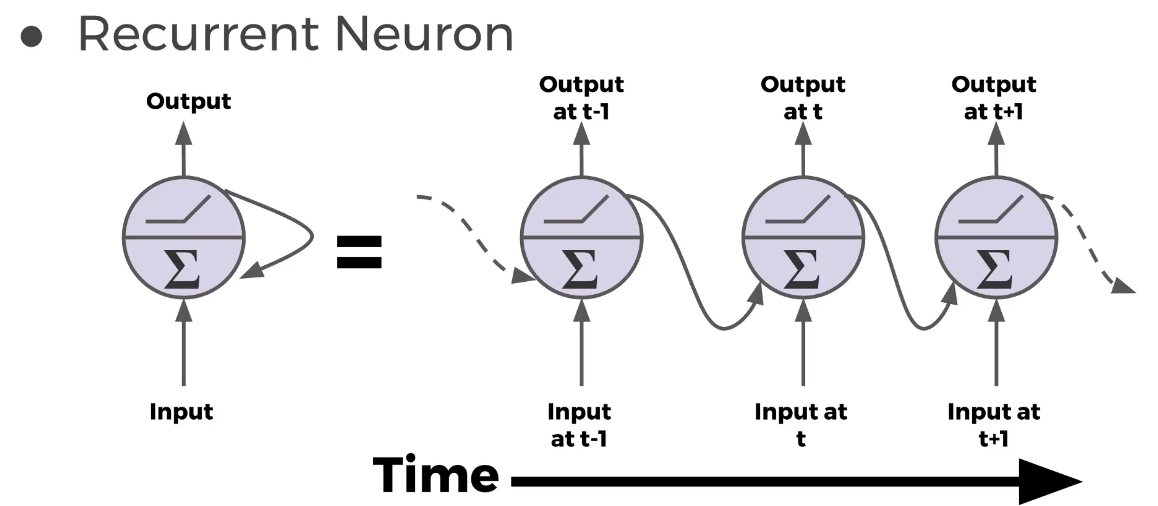

- 시간 전체를 펼쳐 보면 위와 같은 모양
- 시간을 나타내는 x축, 입력이 t-1인 특정 순환 뉴런은 t-1이라는 출력을 갖고, 입력이 t 상태인 뉴런에 전달
- t 시간은 출력 t를 가지고 출력을 t+1 시간에 입력으로 넣고 계속 반복됨
- 위의 순환 뉴런을 언롤링 한다고 말함
- 뉴런은 실제로 이전 시간 단계에서 입력을 받고, 현재 시간 단계에서도 입력을 받음(뉴런은 두 세트의 입력을 받음)
- 이전 시간 단계에서 온 입력의 함수인 이 셀들은 메모리 셀로 알려져 있고, 순환 신경망은 시퀀스나 단일 벡터 값의 입력과 출력에 있어 유연함

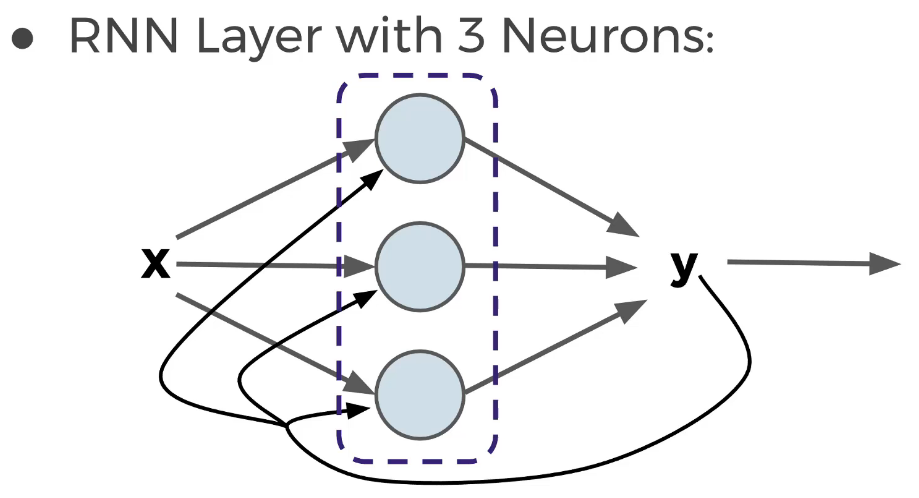

- 하나의 순환 뉴런을 보고 전체 시간을 펼쳐 보았으나 전체 층에서도 가능함
- 입력 x가 있고 순환 뉴런을 통과함, 출력 y를 볼 수 있는데 이 출력 y 를 다시 그 층안에 있는 모든 뉴런에게 넘김
- 이 개념을 전체 층의 시간에 적용함
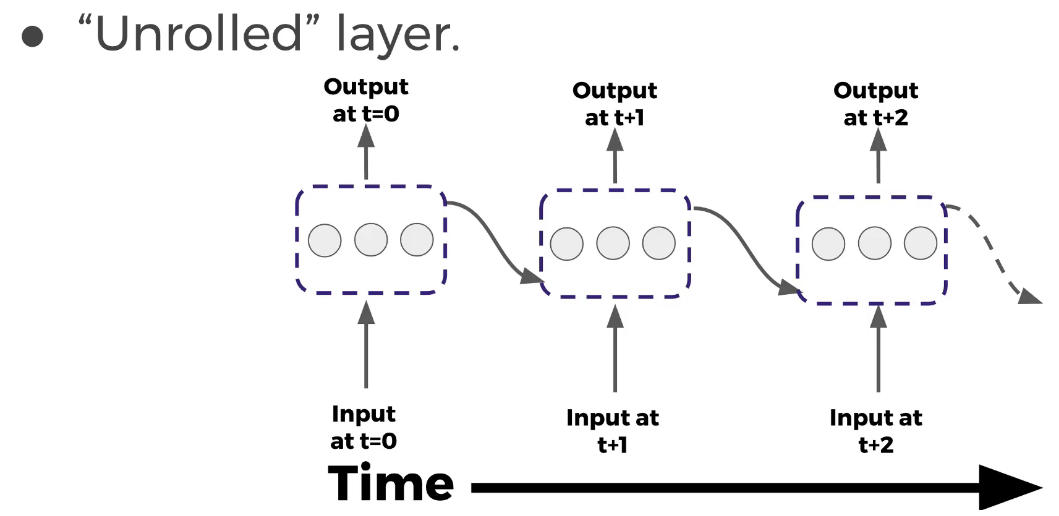

- 입력이 t=0이고, 그리고 그 출력을 입력 t+1에 전달, 같은 개념을 전체 층에 적용
- 시간 단계 t상에서 이런 순환 뉴런의 출력은 이전 시간 단계로부터의 모든 입력 함수임
- 기술적으로 이력 정보를 순환 뉴런 속으로 또는 순환 뉴런의 층으로 전달함
- 이런 시간 단계를 넘어 어떤 상태를 보존하는 순환신경망의 부분을 `메모리 셀`이라고 부름

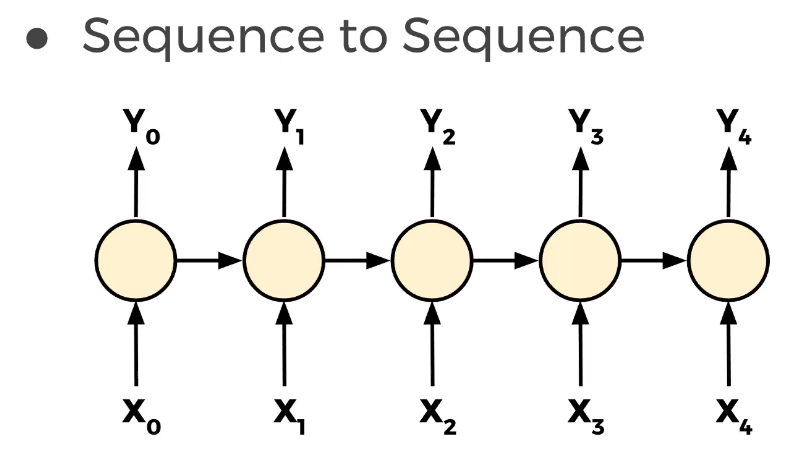

- 연간 일일 판매 데이터 같은 시계열 정보를 입력하여 미래의 특정 기간으로 옮겨 간 데이터의 시퀀스를 돌려 받는 것이 있음
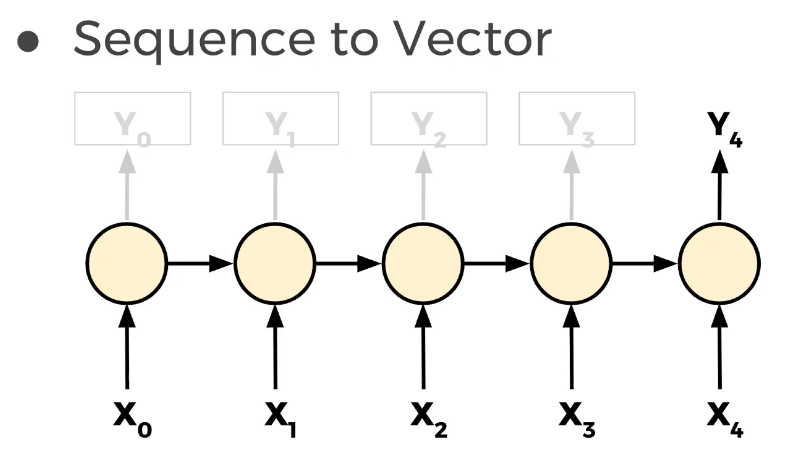

- 입력과 출력의 다른예로 시퀀스를 입력해서 벡터를 출력으로 요청하는 경우
- 이런 종류의 입력과 출력에 대한 순환 신경망을 사용하는 일반적인 예는 `감성 점수`
- 단어들의 시퀀스 예를 들면 영화 리뷰 같은 구절을 전달하고 벡터를 요청할 수 있는데, 사람들이 영화를 좋 아하는 긍정은 1 , 좋아하지 않으면 -1 혹은 0을 나타냄. 이런 것은 시퀀스 입력의 한 예가 될 수 있음

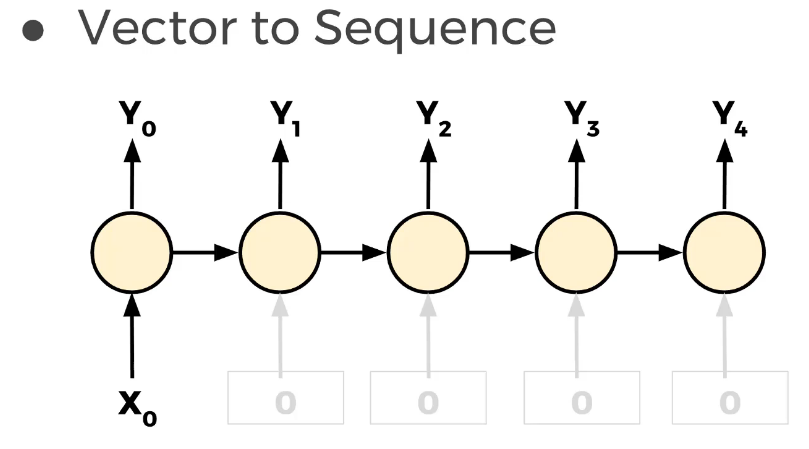
- 반대편에서 입력으로 벡터를 전달할 수 있음
- 첫 시간 단계의 첫 입력은 전체 시간 단계에 0을 전달하고 출력은 시퀀스가 되게 함(Vector to Sequence)
- 벡터를 예로 들면, 시퀀스는 단일 단어의 시드를 제공하여 실제로 나올 법한 높은 확률의 전체 시퀀스 구절을 얻을 수 있음
- 예) hello으로 how are you 시퀀스 

### 6. LSTM와 GRU

- 순환신경망(RNN)의 단점은 아주 큰 시퀀스를 훈련할 때, 시간이 지나면 신경망이 맨 처음의 입력을 잊어버리는 것
- 나중에 입력된 텍스트 문서의 훈련 배치들은 결국 맨 처음 입력한 텍스트의 가중치를 덮어쓰기 시작하는데, 신경망을 통과하는 각 단계에서 첫 번째 입력정보를 잃고 싶지 않을 때, 신경망에 `장단기 메모리`를 갖게 함
- 최근에 훈련된 데이터가 있는 단기 메모리와, 훈련이 시작되었을 때 맨 처음부터 있던 모든 데이터가 있는 장기 메모리사이의 균형을 맞출 필요가 있음
- **LSTM**, **장단기 메모리 셀**은 순환 신경망에 드러난 이런 문제를 해결하기 위해 만들어짐

< 일반적인 순환 신경망>
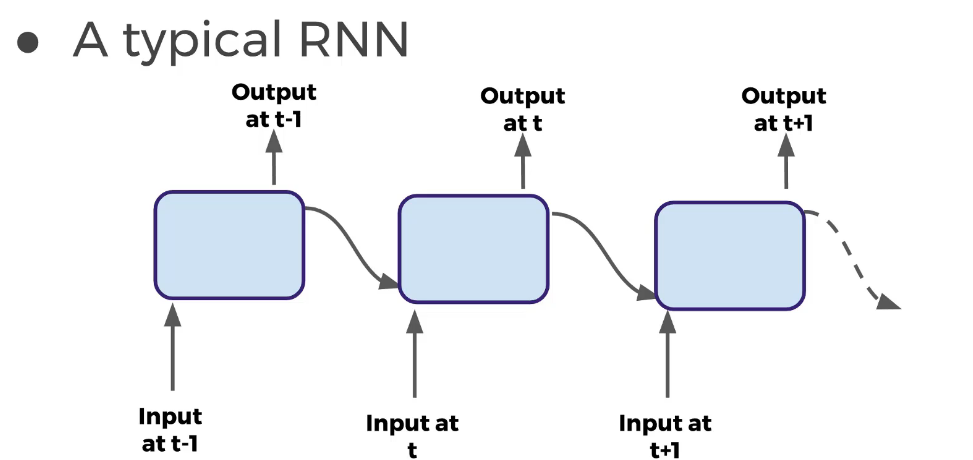
-입력으로 t-1, 출력으로  t-1, 그 출력은 다시 입력 t에 전달
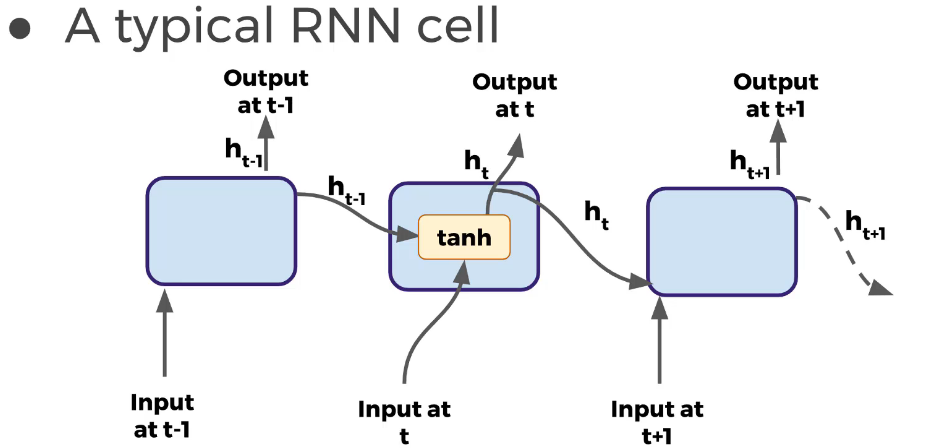
- 이런 출력(은닉), 출력 t-1라 하는 대신에 ht-1 라고 할 수 있음
- 그런 다음 입력 t에 전달해서 활성화 함수 tanh를 통과하고 거기서 나온 ht는 출력 t가 됨
- ht는 순환 신경망의 일반적인 출력

< 장단기 메모리 셀 `LSTM`>
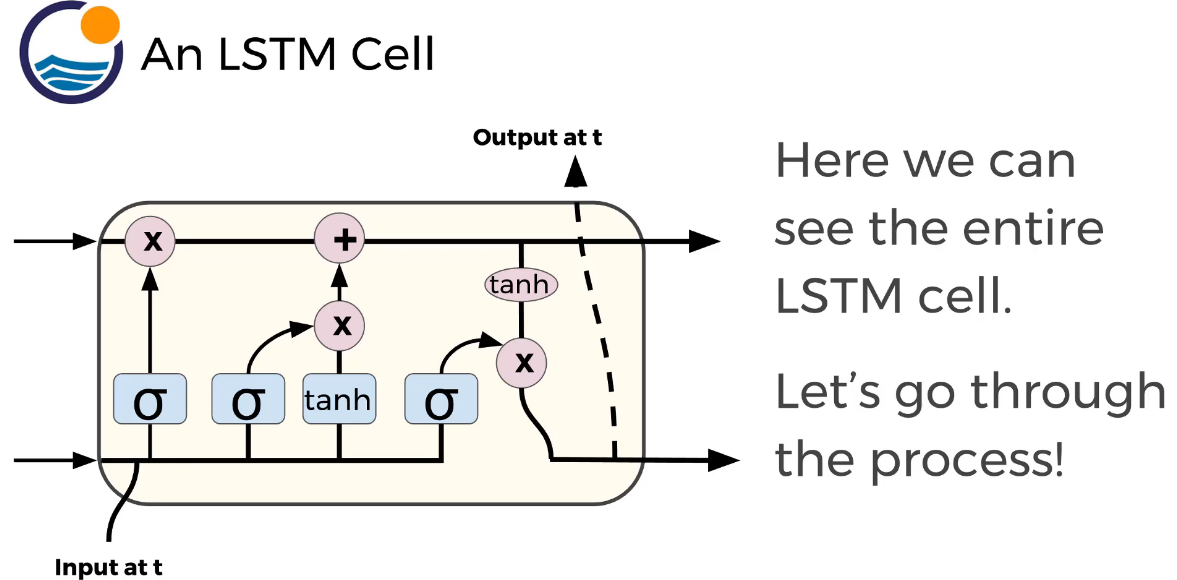

- 정상적인 순환 뉴런으로부터 원래의 입력 

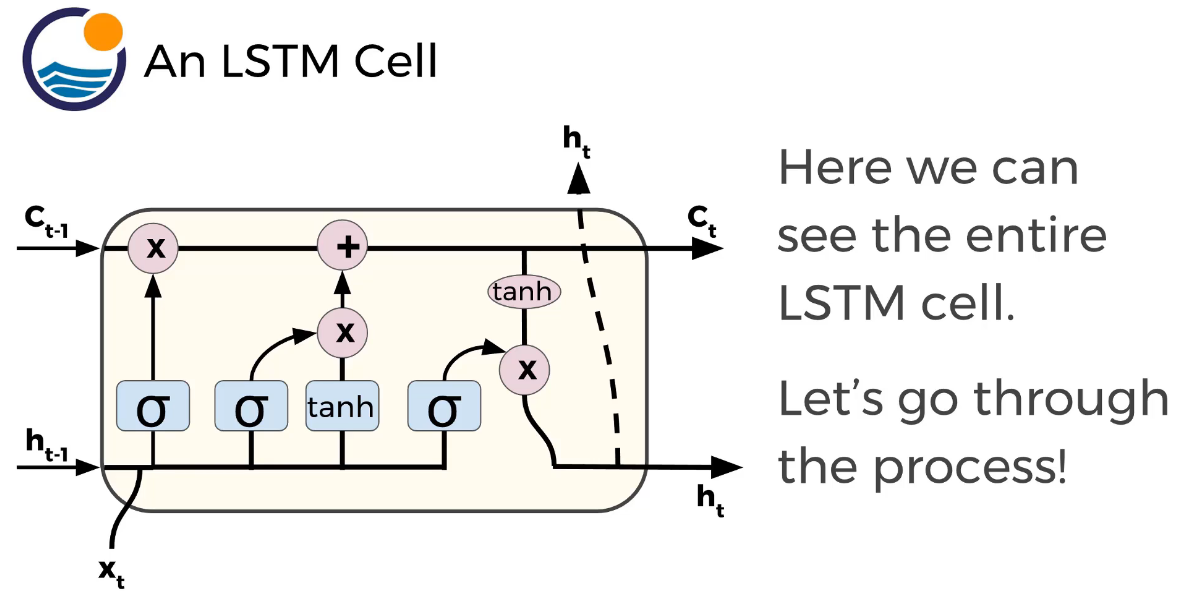

- 정상적인 순환 뉴런으로부터 원래의 입력 ht-1, 그리고 xt를 갖고 셀 스테이트라고 부르는 세 번째 입력을 갖음
- ct-1에 셀 스테이트를 받고 있음. 또 출력으로 ht가 있고, 셀 스테이트도 갖는데 현재 셀 스테이트인 ct임
- 입력으로 ht-1과 xt와 이전 셀 스테이트인 ct-1을 갖고 출력으로 ht와 현재 셀 스테이트인 ct를 갖음

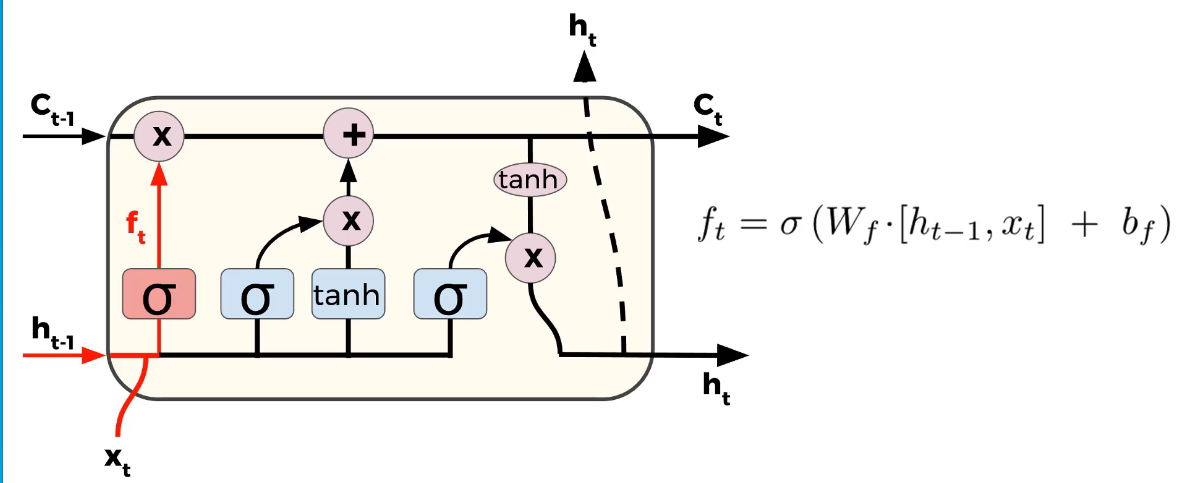
- 순차적으로 진행 했을때, 첫 단계는 `망각 게이트 층`
- 셀 스테이트로부터 어떤 정보를 잊거나 지워버릴지 결정함 
- ht-1과 xt를 전달하고 가중치와 편향값으로 선형 변환을 한 뒤에 시그모이드 함수에 넣음
- `시그모이드 층이기 때문`, 출력은 숫자 `0-1 사이`, 1은 입력을 기억, 0은 잊거나 지워버리라는 뜻
- 예) 언어 모델에서 이전 단어로부터 다음 단어를 예측하려고 한다면, 셀 스테이트는 현재 주어의 성별을 포함하고 있어서 정확한 대명사를 고를 수 있고, 새로운 주어를 보게 되면 이전 주어의 성별을 버리고 싶어함 (시퀀스 같은 자연어를 처리 할 때 망각 게이트가 사용되는 방법)

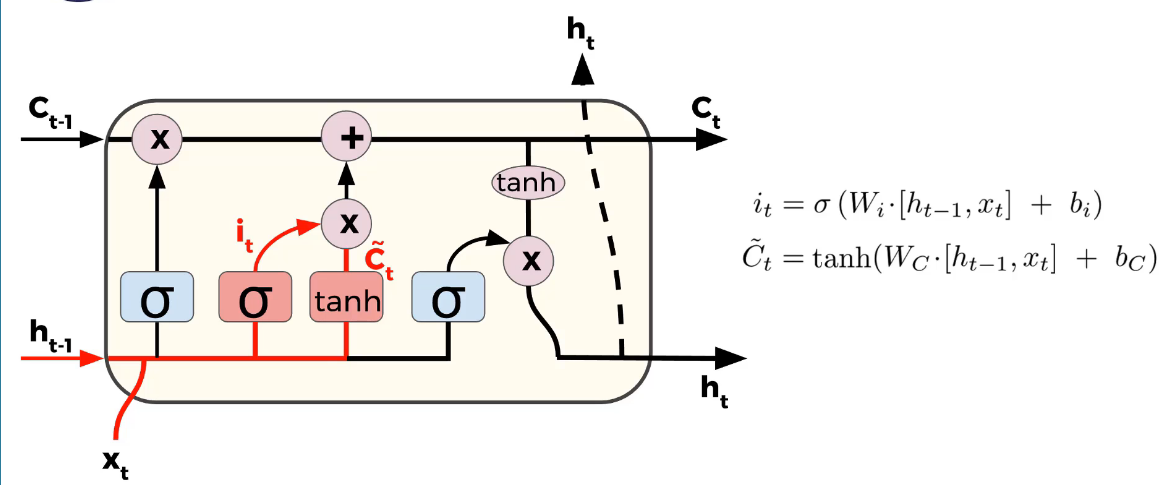
- 어떤 것을 버릴지 결정했으면, 셀 스테이트에 무엇을 저장할지 결정함(ct)
- 첫번 째 부분은 시그모이드 층, 두 번째 층은 thanh 층
- 시그모이드층(입력 게이트 층), 입력 게이트 층은 it와 같고 수식은 it=σ(wi·[ht-1, xt]+bi)
- 시그 모이드 함수를 통과하면 0과 1사이의 수많은 값을 갖음
- 두 번째 부분은 tanh층 ht-1를 가져와 선형 변환하고 tanh에 통과시켜 t를 출력함
- 새로운 후보군이라 부르는 벡터를 생성하면서 끝냄
- Ct 위에 작은 틸드 표시 ( 이러한 후보군들은 셀 스테이트에 추가될 수 있음)
- 다음 단계로 이 두개를 합쳐서 `셀 스테이트에 업데이트`
- 예) 언어 모델에서 셀 스테이트에서 새 주어의 성별을 추가한 뒤, 이미 버리기로 결정한 이전의 것을 대체하고 싶다면 지금 이전 셀 스테이트를 업데이트 할 때임. 이전 셀 스테이트는 ct-1, 새로운 셀 스테이트 ct로 업데이트하고 싶다면 ct+1로 전달할 수 있음

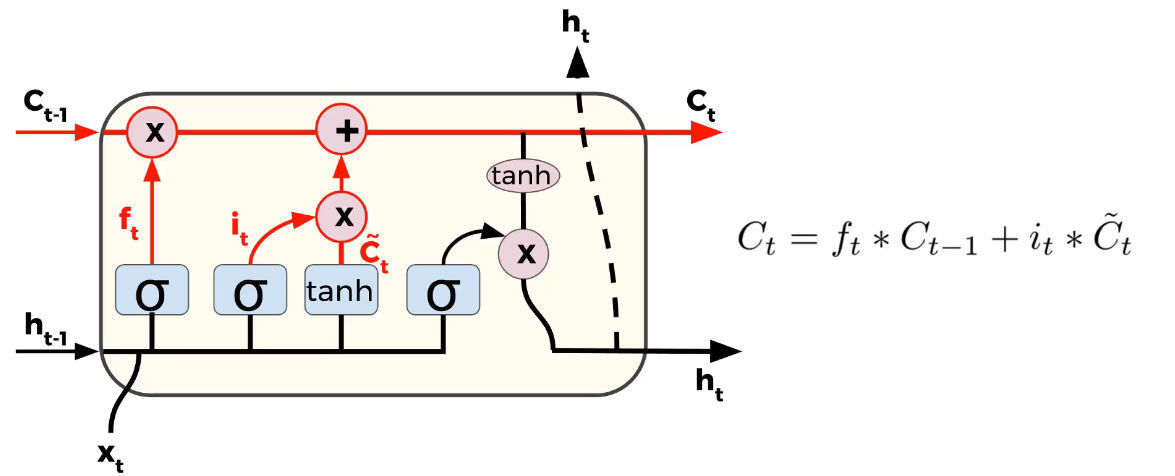

- 이전 상태인 Ct-1를 ft로 곱함
- 그리고 첫 번째 시그모이드 층에서 버리기로 결정한 것을 지움
- 입력층의 it를 후보군인 ~ct와 곱하여 더함 ct =ft* Ct-1 + it* ~ct
- 위가 새로운 후보군이고 상태값을 얼마나 업데이트 할 것인지에 따라 후보군의 규모가 결정됨
- 예) 언어 모델의 경우, 우리가 실제로 이전 주어 성별을 버리고 앞 단계의 결정을 기반으로 새로운 정보를 추가할 것임


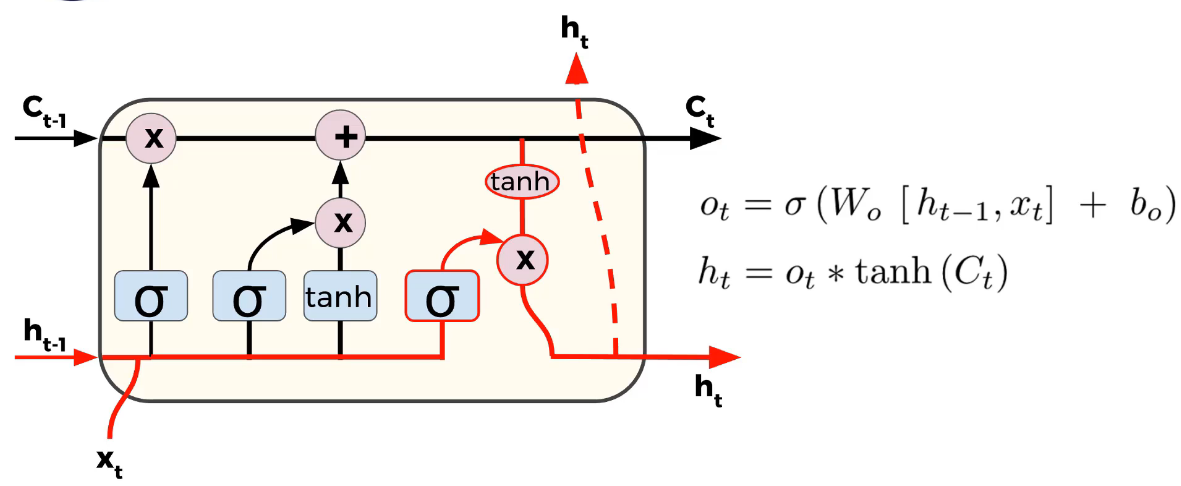
- 최종 결정은 출력 ht가 무엇이 될 지
- 이 출력은 셀 스테이트를 기반으로 걸러진 형태
- ht-1과 xt를 사용해서 선형 변환을 한 후에 시그모이드 층에 통과하여 셀 스테이트의 어떤 부분이 출력지 결정
- 그 다음 셀 스테이트를 tanh에 넣으면 -1과 1의 사이의 값을 보내고, 시그모이드 출력과 곱해서 결정된 단 하나의 값으로 출력함
- 다시 한번 ht-1을 선형 변형하고 시그모이드 층에 통과시켜 출력을 갖게 되면 우리는 그것을 출력 ot라고 하고, tanh에서 나온 t나 현재 셀 스테이트와 곱하기해서 ht를 가져옴
 

> **`LSTM 셀의 피폴 변수`**
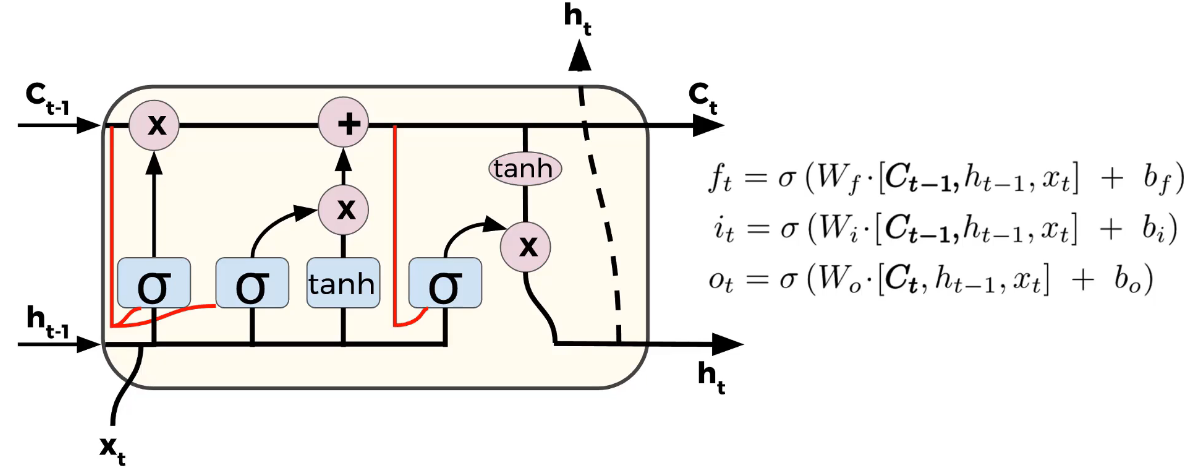
- 피폴 변수를 모든 게이트에 더할 수 있기 때문
- ft, it, ot가 이전 셀 스테이트나 Ct-1 을 볼 수 있게 해줌
- 함수 [ht-1, xt] 대신에 ct-1를 전달할 수 있으며, 출력으로 ct를 바로 전달할 수 있음
- LSTM 위드 피폴

> **`LSTM의 다른 형태인 게이트 순환 유닛 GRU`**
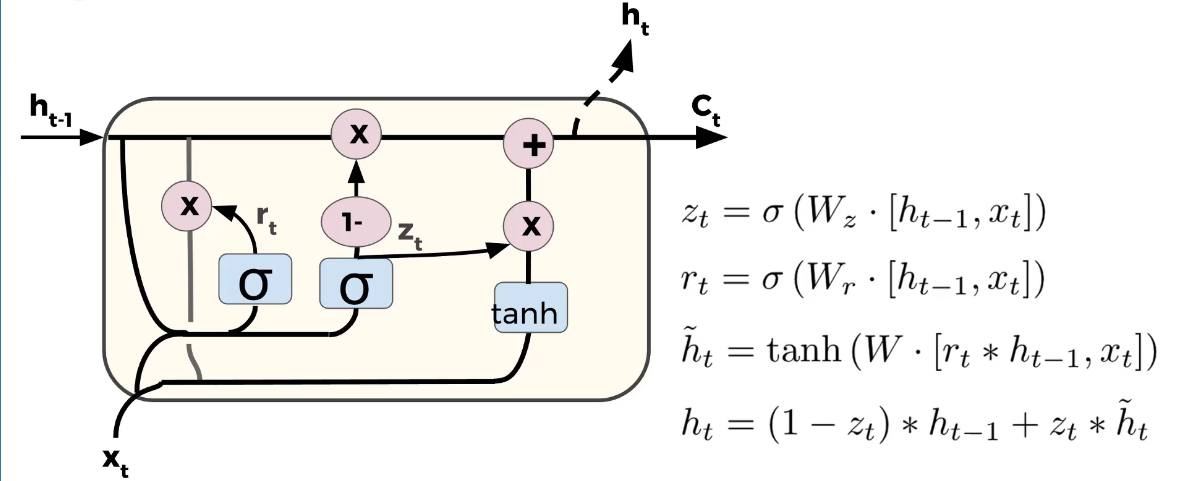
- 망각과 입력 게이트를 합쳐서 하나로 만들어 업데이트 게이트로 부르고,
- 셀 스테이트와 은닉층을 하나로 합침 -> 표준 LSTM 모델보다 더 간단함

### 7. 케라스와 순환 신경망(RNN) 프로젝트 - Part 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('data/Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
df.index.feq='MS'

In [ ]:
df.head()

-> 맥주와 술의 매출 자료

In [ ]:
df.columns = ['Sales']

In [ ]:
df.plot(figsize=(12,8));

-> 실제 매출 주기(계절에 대한 변화가 드러나며, 전반적인 성장세)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
results = seasonal_decompose(df['Sales'])
results.plot();

-> 계절성 요소와, 전반적 추세 확인

In [ ]:
results.seasonal.plot(figsize=(12,8));

In [ ]:
results.seasonal

In [ ]:
len(df)

- 월별 데이터이고, 매월 1일마다 데이터가 있음. 미래 1년을 예측하기 위해 미래의 약 12 포인트 (325-12)

In [ ]:
train = df.iloc[:313]
test = df.iloc[313:]

In [ ]:
train.head(3)

In [ ]:
test.head(3)

In [ ]:
test.shape

##### 신경망을 실행할 때는 데이터를 스케일링하거나 정규화 해야함

In [ ]:
# 정규화 예 

ser = np.array([23,56,2,13,14])

print(ser.max())  # fit
print(ser/ser.max())  # transform

    - 신경망은 편향과 가중치를 계산하기 때문에, 심각하게 왜곡한 데이터가 있을 때 가장 작은 포인트가 가장 높은 포인트에 비해 너무 낮을 수 있음. (예를 들어 위의 시계열 낮은 포인트 4000, 가장 높은 포인트는 15000)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)  # 스케일링 과정에서는 훈련 데이터만 피팅함. 전체 데이터에 피팅하면, 테스트 데이터 셋을 미리 취득하는 것과 같음

-> 훈련 데이터에서의 최대 값을 찾음

In [ ]:
scaled_train = scaler.transform(train)  # 모든 수를 feature_range 가 0과 1 사이가 되도록 피팅하는 것
scaled_test = scaler.transform(test)

### 8. 케라스와 순환 신경망(RNN) 프로젝트 - Part 2

- 시계열 배치를 레이블에 따라 피드하기
- 배치를 피드하기 위해서 Numpy를 사용해 [t1, t2, t3]-> [t4] (시점1, 시점2, 시점3 -> 시점4 레이블 요구
- 케라스에서는 전처리 시계열 제너레이터 객체가 있음

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_train

- 스케일러 객체를 훈련 데이터에만 피팅했기 때문에, 테스트 데이터가 훈련 데이터의 최댓값보다 큰 아이템이나 레이블을 가졌다면 당연히 1보다 큰 수로 피팅될 것
- 마지막 12개월이 테스트 데이터셋이고 여기에 훈련 데이터셋의 최댓값보다 큰 테스트 데이터셋 값이 있어서  scaled_test를 호출하면 1보다 약간 큰 값이 나옴(데이터 스케일링의 핵심 관건은 모든 수가 대략 0과 1사이 또는 그 근처에 있는 것으로, 스케일링한 테스트 데이터셋에 1보다 큰 수가 있어도 문제가 되지 않음)

In [ ]:
scaled_test

In [ ]:
scaled_train[:5]

In [ ]:
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length=n_input, batch_size=1) # 같은 간격으로 수집된 데이터 포인트의 시퀀스를 받아들이는 것


In [ ]:
len(scaled_train)

In [ ]:
len(generator) # 313에서 입력개수를 뺀 수

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length=n_input, batch_size=1) # 같은 간격으로 수집된 데이터 포인트의 시퀀스를 받아들이는 것


In [ ]:
print(len(scaled_train))
print(len(generator)) # 313에서 입력개수를 뺀 수

In [ ]:
generator[0]

In [ ]:
X,y = generator[0]

In [ ]:
X

In [ ]:
X.shape

-> X는 현재 3차원

In [ ]:
y

- Generator는 원하는 입력 개수대로 데이터를 가져오고, 바로 다음 시점을 만들어 반환할 수 있음
- X는 처음 3개의 포인트, y는 네 번째 포인트
- `순환 신경망에 대한 특징과 레이블`
- **훈련 시퀀스가 얼마나 길어야 하는지, 예측할 바로 다음 포인트를 정의하는 것**

- `입력 개수를 결정하는 방법`
- 한 해에 걸쳐 계절에 따른 변화가 분명한 데이터셋을 다루고 있다면 순환 신경망이 그 계절성을 찾을 수 있도록 적어도 12개의 데이터 포인터를 입력해야 함.
- 더 큰 망과 훈련 데이터를 가져야 하는 것이고 훈련 시간도 대체로 더 오래걸림 그러나 더 좋은 결과로 이어질 수 있음

- **`Batch_size`** 

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length=n_input, batch_size=2) # 같은 간격으로 수집된 데이터 포인트의 시퀀스를 받아들이는 것

In [ ]:
print(len(scaled_train))
print(len(generator))
X,y = generator[0]
print(X.shape)

In [ ]:
print(X)

In [ ]:
print(y)

-> X를 살펴보면 두 배치임. 
- 일반적으로 순환 신경망의 시계열 분석에서 배치 사이즈가 더 작을수록 훈련이 더 잘됨
- batch_size를 1로 하면 한 번에 한 시점만 입력(순환 신경망에서 일반적으로 잘 작동함)
- batch_size를 너무 크게 하면 신경망이 훈련 데이터에 과적합함
- 그러나 100% 정답은 없고 언제든지 batch_size와 입력 개수를 실험하고, 무엇이 좋은 값인지 평가 기준을 이용해 확인

### 9. 케라스와 순환 신경망(RNN) 프로젝트 - Part 3

- 모델을 만들어 제너레이터 객체에 피팅하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
n_input = 12  #일년 또는 12개월치 데이터를 13번째 개월을 예측하기 전에
n_features =1 # 기본으로 열이 몇개 인지 정의 

train_generator = TimeseriesGenerator(scaled_train, scaled_train,
                                      length=n_input, batch_size=n_features)

In [ ]:
model = Sequential()

model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))  # LSTM 층 추가
model.add(Dense(1)) # 뉴런 하나 추가
model.compile(optimizer='adam', loss='mse')

- n_input -> y 레이블 전에 몇개를 볼지 결정(3개의 시점을볼지, 1개의 시점을 볼지 )
- 시계열에서의 특징 개수(n_features)는 항상 1 -> 하나의 타임스탬프만을 하나의 특징으로 가지기 때문

In [ ]:
model.summary()

In [ ]:
model.fit_generator(train_generator, epochs=25) # 하나의 에포크는 전체 훈련 데이터에 대해 훈련함(에포크가 많을 수록 더 오래 걸림)

In [ ]:
model.history.history.keys()

In [ ]:
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss']);

In [ ]:
myloss = model.history.history['loss']

plt.plot(range(len(myloss)),myloss);

##### 테스트 데이터 평가 
- 평가 배치 만들기
- 위의 망은 12개의 지나간 시점을 본 다음, 13번째 시점을 예측함
- 훈련 데이터의 마지막 12개 포인터가 필요하고, 이것은 테스트 데이터의 첫 번째 포인트를 예측하기 위한 것

In [ ]:
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch # 훈련 데이텃 셋의 마지막 12개 포인트

- 위의 TimeseriesGenerator 객체의 반환 배열 모양은 3차원이었기 때문에
- first_eval_batch 모양을 바꿔주어야 함

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,n_input, n_features))
first_eval_batch

In [ ]:
model.predict(first_eval_batch)

In [ ]:
scaled_test

##### 미래값 예측하기 (RNN 모델 활용)

In [ ]:
test_predictions = []

# Numpy 배열이 올바른 차원임을 확실하게 하는 것 
# first_eval_batch는 훈련 데이터셋의 마지막 n_input 포인트(미래의 한 포인트를 예측하기 위해 사용함) -> 테스트 데이트 셋의 첫번째포인트

# 지난 포인트 12개를 받아, 13번째 포인트를 예측하려고하면, 바로 지난 값 12개 필요
first_eval_batch = scaled_train[-n_input:] 
# 훈련 데이터셋에서 마지막 입력 개수의 값을 가져오고, RNN이 원하는 형식으로 바꿈
# TimeseriesGenrator 출력과 같은 형식 
current_batch = first_eval_batch.reshape((1,n_input, n_features))

# 어디까지 예측할 것인지 결정(len(test)) 예를 들어 24포인트까지 예측하고 싶다면 len(test)를 24로 변경 
for i in range(len(test)): # 테스트 길이만큼 미래 예측 
    
    # 12포인트보다 한 시점 앞선 것, current_batch를 전달하고 예측 [0]은 형식화를 위해서 위에서 보면 [[]]에 갇혀있음
    current_pred = model.predict(current_batch)[0] 
    
    # 예측값 저장
    test_predictions.append(current_pred)
    
    # 현재 배치가 예측값을 포함하도록 업데이트함
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)  # 배치 업데이트(복잡)
    

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:] 

current_batch = first_eval_batch.reshape((1,n_input, n_features))

In [ ]:
model.predict(current_batch)

In [ ]:
my_first_pred = model.predict(current_batch)[0]
my_first_pred

In [ ]:
current_batch

In [ ]:
current_batch.shape

- 0.74보다 한시점을 앞을(my_first_pred) 예측하고자 함. 12개의 지난 값이 필요하기 때문에 current_batch에서 첫 번째 값을 버리고 예측값을 맨 마지막에 추가함

In [ ]:
current_batch[:,1:,:]  # 차원을 모든 것을 의미하고, 인덱스 1에서 시작해 끝까지 가져옴

In [ ]:
current_batch[:,1:,:].shape

In [ ]:
current_batch[:,1:,:],[[my_first_pred]]

In [ ]:
np.append(current_batch[:,1:,:],[[my_first_pred]], axis=1)

In [ ]:
np.append(current_batch[:,1:,:],[[my_first_pred]], axis=1).shape

- 순환신경망에는 어느정도 한계가 있음. 12개의 지난 포인트를 이용해 미래의 포인트 하나를 예측하는 모델의 특별한 훈련 방법이기 때문에

In [ ]:
test_predictions

-> 해당 test_predictions은 스케일링 한 것으로, 스케일링 과정 반대로 수행

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize=(12,8));

In [ ]:
model.save('mycoolmodel.h5')

In [ ]:
pwd

In [ ]:
from keras.models import load_model

In [ ]:
new_model = load_model('mycoolmodel.h5')

In [ ]:
new_model.summary()

## 13. 순환 신경망을 사용하는 다변수 시계열

- LSTM과 순환 신경망을 사용하여 다변수 시계열을 예측하는 방법

<LSTM 단점>
- 모든 신경망과 마찬가지로 블랙박스 특징이 있어, 모델 안에서 무엇이 일어나는지 모르기 때문에 다변량 시계열을 예측하기 어려움
- 다변량 시계열 뿐만 아니라, 일반적으로 시계열에 순환신경망을 사용할 때 해당 하는 문제
- 블랙박스 이기 때문에, 네트워크에 중요한 요소를 알 수 없음(미래 예측을 정보를 전달하는 깊고 규모가 큰 네트워크 경우)
- 시계열은 수학분야라 LSTM보다 더 간단한 SARIMAX, VARMAX 등 여러 대안이 있음
- 위의 대안은 다변수 시계열 데이터나 단일 시계열에도 해당 모델을 잘 적용할 수 있고 해석도 가능함

- 순환신경망을 이용하여 시계열을 예측하면 좋긴하지만, 해석할 수 없는 큰 단점이 있어 ARIMA 기반 모델을 사용하는 것이 좋음

- 다변량 시계열이 있다고 가정할때, 아래의 두가지를 변경하면 가능

(1) LSTM 레이어의 입력 모양을 2차원 구조를 반영하도록 변경
> -  기존의 n_features 라는 변수가 1이였다면, 다변량 시계열의 경우 변수의 개수에 맞게 n_feature 값을 바꿔줌

(2) 최종 밀집층(전결합층)
> - 기존에는 하나의 값만 예측 했기 때문에 뉴런이 1개였으나, 다변량 시계열은 여러 특징의 미래를 예측해야 함
> - 변수당 하나의 뉴런이 필요함